In [4]:
import math
from pathlib import Path

import numpy as np
from matplotlib import pyplot as plt

from island_influence import project_properties
from island_influence.agent import AgentType
%autoreload

UsageError: Line magic function `%autoreload` not found.


# Markdown

This is a markdown cell

In [30]:
base_save_dir = Path(project_properties.output_dir, 'experiment_results', 'figs')
save_dir = Path(base_save_dir, 'param_sweep')
if not save_dir.exists():
    save_dir.mkdir(parents=True, exist_ok=True)
        
tag = ''
save_format = 'png'
rng = np.random.default_rng()

In [31]:
def ccea_func(history):
    x = history[-1]
    return (1/(1+np.exp(-x)))*np.log(x+1)*(1/5)

In [32]:
def mfl_func(history):
    x = history[-1]
    return (np.log(x+1)/np.log(3))**(3/2)

In [33]:
def island_func(history):
    noise = rng.normal(loc=0.1, scale=0.05)
    if gen_idx % 15 == 0:
        noise = rng.normal(loc=-0.3, scale=0.05)
    x = history[-1]
    return x + noise

In [34]:
num_gens = 100
num_runs = 2

fitness_data = {
    'ccea': [
        [ccea_func(np.arange(0, idx, 1)) for idx in range(1, num_gens)],
    ],
    'mfl': [
        [mfl_func(np.arange(0, idx, 1)) for idx in range(1, num_gens)],
    ],
    'island': [
        [island_func(np.arange(0, idx, 1)) for idx in range(1, num_gens)],
    ],
}

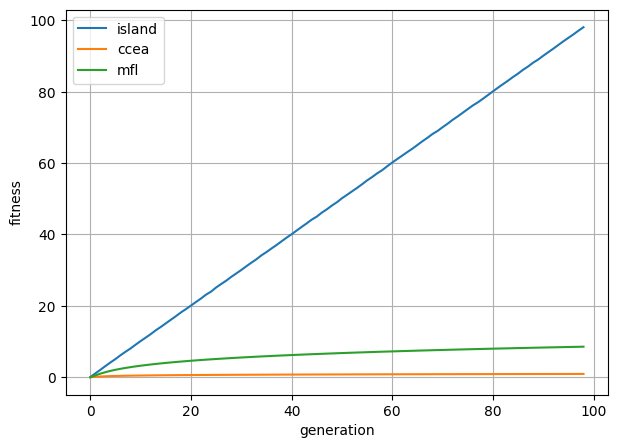

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))

plot_keys = [
    'island',
    'ccea',
    'mfl'
]
agent_keys = [f'AgentType.{element.name}' for element in AgentType]
# plot_keys.extend(agent_keys)

for each_key in plot_keys:
    if each_key in fitness_data:
        agent_fitnesses = fitness_data[each_key]
        # issue arises due to first few generations not necessarily having the max number of policies
        max_runs = []
        for each_stat_run in agent_fitnesses:
            stat_run_maxs = []
            for gen_fitnesses in each_stat_run:
                max_fitness = max(gen_fitnesses) if isinstance(gen_fitnesses, list) else gen_fitnesses
                stat_run_maxs.append(max_fitness)
            max_runs.append(stat_run_maxs)

        min_gens = [len(each_fits) for each_fits in max_runs]
        min_gens = np.min(min_gens)
        max_runs = [each_run[:min_gens] for each_run in max_runs]
        means = np.mean(max_runs, axis=0)
        stds = np.std(max_runs, axis=0)
        stds /= math.sqrt(len(agent_fitnesses))

        gen_idxs = np.arange(0, len(means))
        axes.plot(gen_idxs, means, label=f'{each_key}')
        axes.fill_between(gen_idxs, means + stds, means - stds, alpha=0.2)

axes.set_xlabel(f'generation')
axes.set_ylabel('fitness')

axes.xaxis.grid()
axes.yaxis.grid()

axes.legend(loc='best')

fig.suptitle(f'{tag}')

fig.set_size_inches(7, 5)
fig.set_dpi(100)

if not save_dir.exists():
    save_dir.mkdir(parents=True, exist_ok=True)

plot_name = f'{tag}'
save_name = Path(save_dir, f'{plot_name}')
# plt.savefig(f'{save_name}.{save_format}')
plt.show()
plt.close()